<img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Logo-ENSG-couleur-2023.svg" style="margin-left:auto; margin-right:auto; width:200px; height:auto;"/>


<center> 
    <h1>ENSG : statistiques appliquées en cartographie</h1> 
    <h2>Réaliser une analyse univariée à l'aide de Python</h2> 
    <h3>Florian Bayer, Sami Guembour, Janvier 2026</h3>
</center> 

<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

*   L'objectif de la seconde partie de ce TD est d'appliquer les connaissances acquises dans la première partie
  
*   Vous utiliserez de nouveau jupyter lab pour réaliser votre petite analyse

*   En cas de difficultés, ne restez pas bloqué et contactez l'enseignant

Attention, les notebooks que vous lancez à partir de la page Git du cours sont **temporaires**. Vous pouvez néanmoins les sauvegarder et les uploader. La manipulation sera montrée en cours

Si vous le souhaitez, vous pouvez cloner ce Git et installer un environnement Conda sur votre ordinateur en suivant cette [procédure](https://github.com/fbxyz/ENSG_L1_cartostat/tree/main/td#comment-cloner-le-repo-git-du-cours-cr%C3%A9er-un-environnement-conda-installer-les-packages-et-lancer-jupyter-lab). 

Une dernière solution, si vous disposez d'un compte google, est d'utiliser [Collaboratory](https://colab.research.google.com), mais il faudra importer les données csv.

<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

# Consignes

La Fédération Française d'Etude de la Reproduction va organiser un congrès, dont le thème sera : état de l'offre de soins et infertilité en France. Il réunira des professionnels spécialisés dans l’assistance médicale à la procréation.

L'introduction de la session plénière aura comme support deux cartes projetées sur grand écran : 

- Evolution de la fécondité des départements français entre 2014 et 2019. 
- Les deux cartes serviront de base à la discussion d’un sujet de la session :  Vers de nouvelles dynamiques de la fécondité en France ?


Comme l’âge des femmes est un facteur d’infertilité et que la répartition de l’âge des femmes n’est pas identique sur les différents territoires étudiés, on vous demande d’utiliser l’indicateur conjoncturel de fécondité. 

Il correspond au nombre d'enfants qu'aurait une femme tout au long de sa vie, si les taux de fécondité observés l'année considérée à chaque âge demeuraient inchangés. Autrement dit, l’indicateur « gomme » l’effet de l’âge sur la fécondité sur la période et les territoires étudiés.

Les cartes seront produites par un prestataire, mais en tant qu’apprenti, on vous demande de lui rédiger par écrit différentes tâches : 
- La discrétisation des 2 cartes (en précisant les bornes "[  ]")
- La méthode de représentation à utiliser (quelle variable visuelle)
- La justification de l’ensemble de vos choix (types de variables, caractéristiques statistiques, choix de représentation, choix des méthodes de discrétisation etc.)

Vous devez choisir la ou les méthodes les plus adaptées selon vous et le nombre de classes, en justifiant vos choix. Référez-vous au cours sur les données, la discrétisation, la sémiologie graphique et le TD précédent sur l'univariée.

Les données sont fournies dans le dossier ./data/ et proviennent de l’Insee.

Attention, il n’est pas encore demandé de réaliser la carte 


<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

# 1. Importation des packages et des données


Pour vous aider, les premières étapes de l'analyse sont guidées

In [44]:
import pandas as pd # Pour importer les données dans un Dataframe
import seaborn as sns # Pour faire les graphiques
from scipy import stats # Un peu de stat
import statsmodels.api as sm # Et pourquoi pas un Q-Q plot...
import matplotlib.pyplot as plt
import numpy as np

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>
Importez les données TD_France.csv dans un Dataframe  <b>df_fr</b> à l'aide de :
    
```python
pd.read_csv()
```
    
Attention, il faut faire en sorte que le fichier TD_France.csv soit accessible depuis votre Notebook. Si besoin, aidez-vous du TD1 partie 1
    
Une autre solution est de charger les données directement à partir du Git du cours : 

```python
pd.read_table(
    r"https://raw.githubusercontent.com/fbxyz/ENSG_L1_cartostat/main/td/data/TD_France.csv",
    sep=","
) 
```
</blockquote>    


In [48]:
df_fr = pd.read_csv("./data/TD_France.csv", decimal=".", sep=",")
df_fr

,Code,Département,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0,01,Ain,1.98,1.87,1.88,1.82,1.86,1.80
1,02,Aisne,2.14,2.09,1.97,2.02,1.95,1.91
2,03,Allier,1.93,1.86,1.91,1.85,1.81,1.85
3,04,Alpes-de-Haute-Provence,1.98,1.95,1.93,1.85,1.82,1.80
4,05,Hautes-Alpes,1.93,1.86,1.80,1.69,1.77,1.78
...,...,...,...,...,...,...,...,...
96,971,Guadeloupe,2.19,2.10,2.14,1.94,2.04,2.25
97,972,Martinique,2.08,1.94,1.90,1.87,1.91,2.00
98,973,Guyane,3.44,3.44,3.61,3.92,3.79,3.74
99,974,La Réunion,2.44,2.46,2.43,2.44,2.40,2.39


Vous pouvez ensuite vérifier le type de variable avec la commande suivante

In [49]:
df_fr.dtypes

Code            object
Département     object
ICF_2014       float64
ICF_2015       float64
ICF_2016       float64
ICF_2017       float64
ICF_2018       float64
ICF_2019       float64
dtype: object

<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

# 2. Représentations graphiques

Utilisez le Dataframe précédemment créé pour réaliser les histogrammes et/ou les boxplots des données qui vous intéressent. N'oubliez pas, pour créer une nouvelle cellule de code, appuyez sur B (sauf sous Collaboratory)

Pour créer une cellule de texte (Markdown), ajoutez une nouvelle cellule avec B puis appuyez sur M


## 2.1 Les histogrammes

### 2.1.1 Avec toutes les données

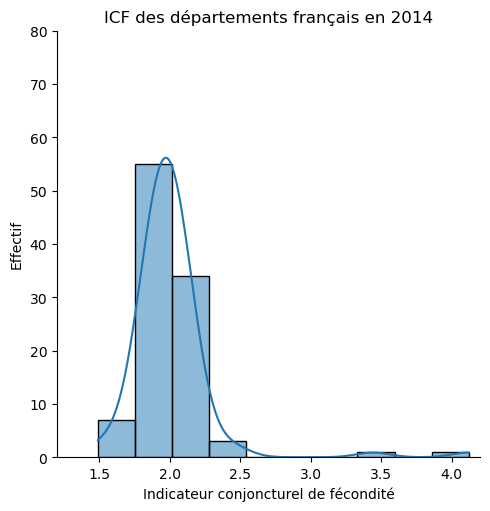

In [50]:
annee = 2014

hist_14 = sns.displot(data=df_fr, x=f"ICF_{annee}", bins=10, kde=True)
hist_14.set(title=f'ICF des départements français en {annee}',
         xlabel='Indicateur conjoncturel de fécondité',
         ylabel='Effectif',
         xlim = (1.2,4.2),
         ylim=(0, 80))

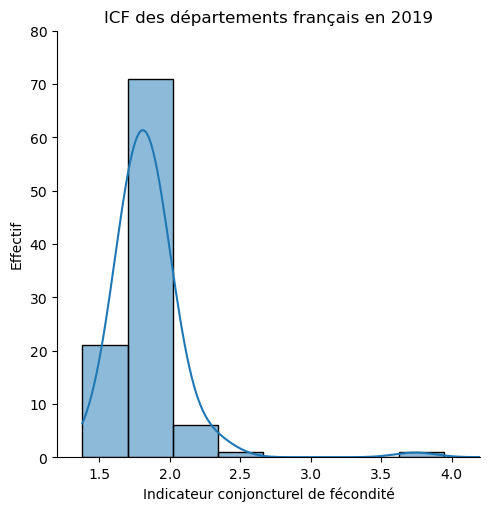

In [51]:
annee = 2019
hist_19 = sns.displot(data=df_fr, x=f"ICF_{annee}", bins=10, kde=True)
hist_19.set(title=f'ICF des départements français en {annee}',
         xlabel='Indicateur conjoncturel de fécondité',
         ylabel='Effectif',
         xlim = (1.2,4.2),
         ylim=(0, 80))

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Interprétez ces résultats graphiques. Que constatez-vous ?
    
</blockquote>    

Séries unimodales étirez à droite, en lien avec des valeurs extrêmes avec un ICF entre 3 et 4 

Il semble également y avoir une plus faible fécondité en 2019 avec plus de départements avec des valeurs <2

### 2.1.2 Sans les valeurs extrêmes

On décide de vérifier la répartition des données sans les valeurs extrèmes.

NB. Le dataframe est passé en melt pour pouvoir appliquer la méthode facet (graphiques 2014 et 2019 côte à côte). Les variables sont passées en ligne, une colonne value est ajoutée

Le format melt est très pratique car il évite de démultiplier le nombre de colonnes (une seule colonne pour les années)

In [62]:
df_fr_m = pd.melt(df_fr, id_vars=['Code','Département'])

# On utilise le filtre par query vu dans le TD1 partie 1, chapitre 2.3 
df_fr_m.query("value < 3")

,Code,Département,variable,value
0,01,Ain,ICF_2014,1.98
1,02,Aisne,ICF_2014,2.14
2,03,Allier,ICF_2014,1.93
3,04,Alpes-de-Haute-Provence,ICF_2014,1.98
4,05,Hautes-Alpes,ICF_2014,1.93
...,...,...,...,...
599,94,Val-de-Marne,ICF_2019,1.96
600,95,Val-d'Oise,ICF_2019,2.29
601,971,Guadeloupe,ICF_2019,2.25
602,972,Martinique,ICF_2019,2.00


Pour supprimer les valeurs extrèmes, on filtre le dataframe et on ne conserve que 2014 et 2019

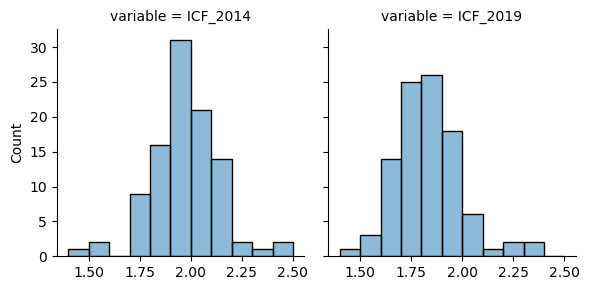

In [35]:
# Création, du facet, avec autant de colonne qu'il y a de modalités dans la colonne variable du dataframe
g = sns.FacetGrid(df_fr_m.query("variable in ('ICF_2014','ICF_2019') and value <3"),
                  col="variable", )

# Il n'est pas possible de faire un displot en facet... Seaborn recommande d'utiliser histplot
g.map_dataframe(sns.histplot, binwidth=0.1, binrange=(1.4, 2.5))

## 2.2 Boxplot pour voir les tendances

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les boxplots avec toutes les valeurs. Pensez à ajouter un titre à votre graphique.
    
</blockquote>   


[Text(0.5, 1.0, "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français")]

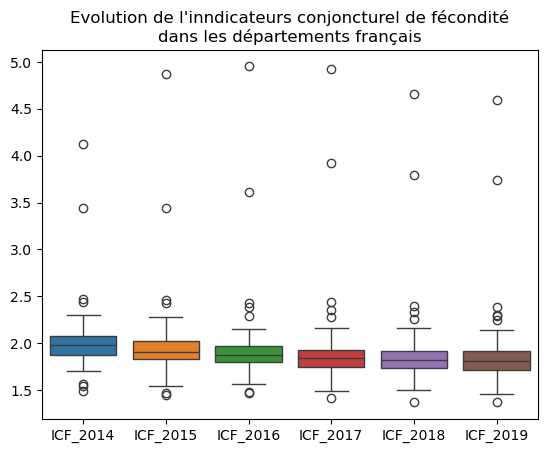

In [36]:
bp = sns.boxplot(data=df_fr)
bp.set(title="Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français")

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les boxplots sans les valeurs extrêmes. Filtrer directement sur les valeurs est risqué (query("value <3")). Il donc est préférable d'enlever toutes les valeurs de Mayotte et de la Guyane qui correspondent à ces valeurs extrêmes

Il est préférable de créer un nouveau dataframe pour cette partie
    
</blockquote>   

[Text(0.5, 1.0, "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français hors Mayotte et Guyane")]

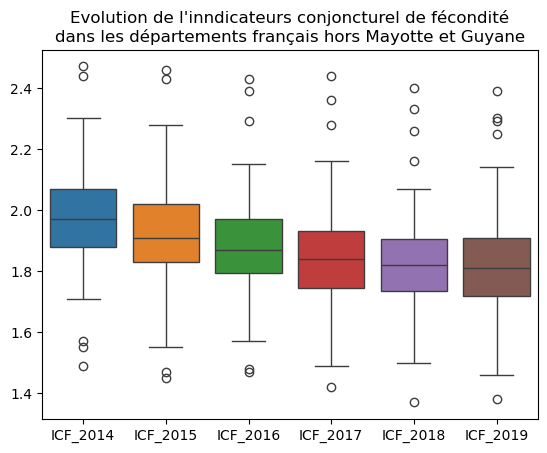

In [60]:
df_fr2 = df_fr.query("Code not in ('973','976')")
bp = sns.boxplot(data=df_fr2)
title = "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français hors Mayotte et Guyane"
bp.set(title=title)

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Interprétez ces résultats graphiques. Que constatez-vous ?

</blockquote>    

En excluant Mayotte et la Guyane, tendance globale à la baisse de la fécondité depuis 2014, avec stabilisation entre 2017 et 2018. 

La dispersion mesurée par l'IQR en 2019 semble montrer une plus grande hétérogénéité entre les départements qu'en 2018

## Exemple Altair

In [56]:
import altair as alt
alt.Chart(df_fr, title="Test Altair").mark_bar(size=15).encode(
    alt.X("ICF_2014:Q", bin=alt.Bin(extent=[1.2, 4.5], step=0.15)),
    y='count()',
    tooltip=['ICF_2014']
)


alt.Chart(...)

<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

# 3. Calculs statistiques

Réalisez les calculs qui vous permettront de mieux interpréter vos données, leur forme, les points d'attention...


<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les calculs univariée avec toutes les valeurs. Reportez vous à la partie 4 du TD1 partie 1
    
</blockquote>   


In [57]:
df_fr.describe()

,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2.006535,1.961683,1.927129,1.892970,1.875446,1.871188
std,0.302104,0.367750,0.383159,0.400211,0.375775,0.371425
min,1.490000,1.450000,1.470000,1.420000,1.370000,1.380000
25%,1.880000,1.830000,1.800000,1.750000,1.740000,1.720000
50%,1.980000,1.910000,1.880000,1.840000,1.820000,1.810000
75%,2.080000,2.020000,1.970000,1.930000,1.920000,1.920000
max,4.120000,4.870000,4.950000,4.920000,4.660000,4.590000


<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les calculs univariée sans les valeurs extrêmes, comme pour les boxplots du point 2.2 précédents (TD1 partie 2). 

Si vous avez créé un Dataframe sans les valeurs extrêmes, réutilisez le
    
</blockquote>   



In [61]:
df_fr2.describe()

,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.970707,1.917374,1.879596,1.841919,1.827980,1.824848
std,0.159016,0.165552,0.159322,0.159308,0.159028,0.165944
min,1.490000,1.450000,1.470000,1.420000,1.370000,1.380000
25%,1.880000,1.830000,1.795000,1.745000,1.735000,1.720000
50%,1.970000,1.910000,1.870000,1.840000,1.820000,1.810000
75%,2.070000,2.020000,1.970000,1.930000,1.905000,1.910000
max,2.470000,2.460000,2.430000,2.440000,2.400000,2.390000


## 3.2 Exemples sur les quantiles

Les cellules suivantes vous montrent comment calculer des quantiles spécifiques avec Pandas : 

### 3.2.1 Afficher les valeurs de quantiles spécifiques

In [ ]:
df_fr.quantile([.20, .80],numeric_only=True)

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Affichez les 5 premiers % et les 95 derniers %
    
</blockquote>   



In [170]:
df_fr.quantile([.05, .95],numeric_only=True)

,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0.05,1.75,1.69,1.67,1.63,1.60,1.61
0.95,2.26,2.21,2.15,2.16,2.16,2.25


## 3.3 Tests de normalité

### 3.3.1 Tests de la normalité sans les extrêmes

Les graphiques précédents ont montré que les séries 2014 et 2019 étaient étirées vers la droite à cause des valeurs de Mayotte et de la Guyane. 

Testons la normalité de la série 2014 sans ces deux valeurs.

In [63]:
# on écrit la query d'exclusion des deux DROM dans une variable pour ne pas le refaire à chaque fois 
q = "Code not in ('973','976')"

# On utilise le module stats de scipy abordé dans la partie 4.3 de la partie 1 du TD1
stats.shapiro(df_fr.query(q)['ICF_2014'])

ShapiroResult(statistic=0.9731698632240295, pvalue=0.040508922189474106)

Le Shapiro test montre que la série 2014 est à la limite de la significativité (p-value = 0.04). 
L'histogramme laissait cependant suggérer une loi normale. On vérifie le kurtosis et le skew pour comprendre

In [67]:
s = df_fr.query(q)['ICF_2014'].skew()
k = df_fr.query(q)['ICF_2014'].kurtosis()

# on fait un print avec un format `f` afin d'obtenir un résultat plus lisible
print(f"""Pour la série 2014 : 
Skew = {s:.3f}
Kurtosis = {k:.3f}
""")

Pour la série 2014 : 
Skew = 0.028
Kurtosis = 1.624



Le coefficient d'asymétrie (Skew) est très proche de 0, ce qui tend à montrer la symétrie de la distribution

Le kurtosis est égal = 1.6, ce qui explique pourquoi le Shapiro-test est à la limite de la significativité. Un kurtosis standardisé de loi normale est normalement proche de 0

In [66]:
stats.shapiro(df_fr.query(q)['ICF_2019'])

ShapiroResult(statistic=0.9591991901397705, pvalue=0.0037455339916050434)

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Pour 2019, le shapiro-test montre que la série est loin de suivre une loi normale : la p-value est fortement significative.

</blockquote>   

On peut également tester si les deux moyennes et les deux variances sont significativement différentes :
- On utilise un test de Levene car la série 2019 ne suit pas une loi normale
- un t-test pour la moyenne car les variances ne sont pas différentes entre les deux séries

In [72]:
icf14 = df_fr.query(q)['ICF_2014']
icf19 = df_fr.query(q)['ICF_2019']

lr, lp = stats.levene(icf14,icf19) # lr correspond au résultat du test de Levene, lp à sa p-value
tr, tp = stats.ttest_ind(icf14,icf19) 

print(f"""
Levene p-value= {lp:.3f}
Ttest p-value= {tp:.9f}
""")


Levene p-value= 0.784
Ttest p-value= 0.000000002



Les variances des deux séries sans ls extrêmes ne sont pas significativement différentes, les moyennes sont significativement différentes

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les tests d'équalité de variance et de moyennes entre 2018 et 2019 :
    
</blockquote>   

In [73]:
icf18 = df_fr.query(q)['ICF_2018']

lr, lp = stats.levene(icf18,icf19) 
tr, tp = stats.ttest_ind(icf18,icf19) 

print(f"""
Barlet p-value= {lp:.3f}
Ttest p-value= {tp:.9f}
""")


Barlet p-value= 0.636
Ttest p-value= 0.892312288



<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Comme suggéré par l'analyse des graphiques, il ne semble pas y avoir de différence entre 2018 et 2019, aussi bien pour les moyennes que pour les variances de l'ICF 2018 vs 2019
</blockquote>   

### Une fonction pour tester les variances et les moyennes
La fonction suivante sélectionne automatiquement les tests adéquats en fonction de la forme des deux séries. C'est le genre de fonction créée avec Python qui s'avère très utile pour de multiples études.

In [70]:
def test_moyenne(x, y,pair=True):
    """
    test de l'égalité de deux moyennes et de leur variance. Vérification de la normalité des données
    et ajustement des tests si nécessaire (normalité, égalité des variances). Test apparié par défaut
    @return: str
    @type x: np.array
    @type y: np.array
    @type y: boolean
    """
    # TODO : trop de conditions, à passer en class
    
    # test de la normalité
    sv_x, sp_x = stats.shapiro(x)
    sv_y, sp_y = stats.shapiro(y)

    if sp_x < 0.05 or sp_y < 0.05:
        var = "H1"
        test_n = "Au moins une distribution ne suit pas une loi normale"

    else:
        var = "H0"
        test_n = "Les deux distributions suivent une loi normale"

    # test de variance, en fonction de la normalité des données
    if var == 'H0':
        vv, vp = stats.bartlett(x, y)
        if vp < 0.05:
            test_v = f"Bartlett : Les variances sont significativement différentes: p= {vp:.4f}"
        else:
            test_v = f"Bartlett : Les variances ne sont pas significativement différentes: p= {vp:.4f}"

    else:
        vv, vp = stats.levene(x, y)
        if vp < 0.05:
            test_v = f"Levene : Les variances sont significativement différentes: p= {vp:.4f}"
        else:
            test_v = f"Levene : Les variances ne sont pas significativement différentes: p= {vp:.4f}"

    if pair : 
         tv, tp = stats.ttest_rel(x, y) 
    else : 
         # test d'égalité des moyennes si les séries sont non appariées, en fonction de l'égalité des variances
        if vp >= 0.05:
            tv, tp = stats.ttest_ind(x, y, equal_var=True)
        else:
            tv, tp = stats.ttest_ind(x, y, equal_var=False)  

    if tp >= 0.05:
        test_m = f"Les moyennes ne sont pas significativement différentes: {np.mean(x):.4f} et {np.mean(y):.4f}, p= {tp:.4f}"
    else:
        test_m = f"Les moyennes sont significativement différentes: {np.mean(x):.4f} et {np.mean(y):.4f}, p= {tp:.4f}"

    return print(f"""{test_n}\n{test_v}\n{test_m}""")

# on appelle la fonction : 
test_moyenne(icf14,icf19)


Au moins une distribution ne suit pas une loi normale
Levene : Les variances ne sont pas significativement différentes: p= 0.7844
Les moyennes sont significativement différentes: 1.9707 et 1.8248, p= 0.0000


## 3.3.2 QQ-plot

Enfin, on valide graphiquement les résultats des tests de normalité avec le QQ-plot

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Faites les QQ-plot 2014 et 2019 avec toutes les valeurs (cf. première partie du TD1, chapitre 4.4) :
    
</blockquote>   

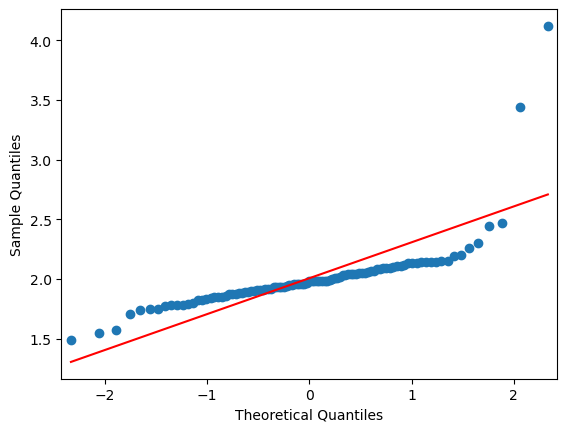

In [77]:
sm.qqplot(df_fr['ICF_2014'], line='s')
plt.show()

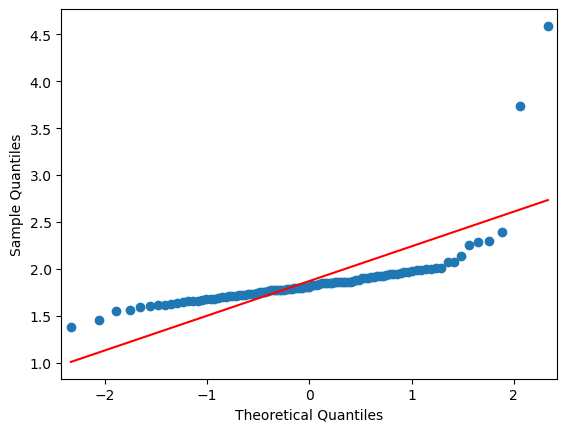

In [78]:
sm.qqplot(df_fr['ICF_2019'], line='s')
plt.show()

<blockquote style="color:#bc4749">
    
<b>Exercice</b> <br>

Et 2014 puis 2019 sans les valeurs extrêmes :
    
</blockquote>   

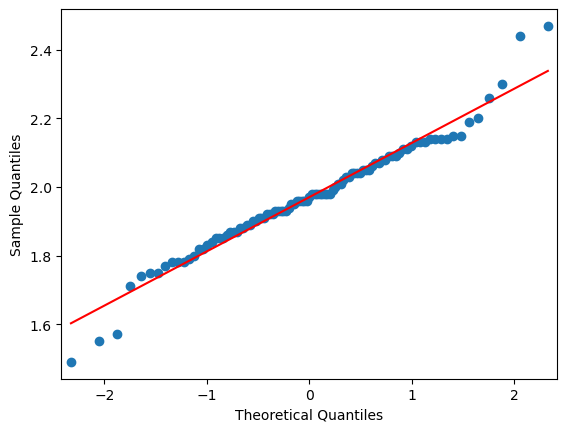

In [79]:
sm.qqplot(df_fr.query(q)['ICF_2014'], line='s')
plt.show()

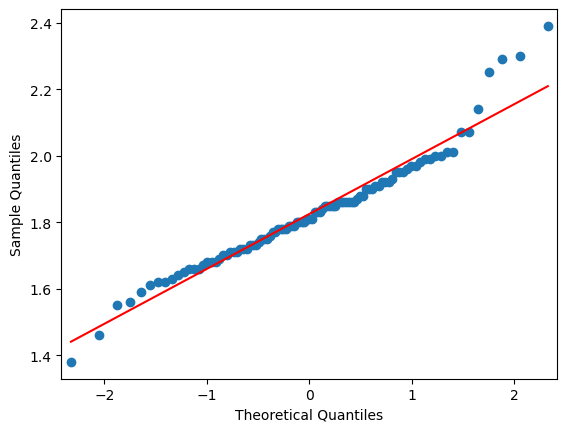

In [80]:
sm.qqplot(df_fr.query(q)['ICF_2019'], line='s')
plt.show()

<hr style="height: 2px; color:  #2c378f ; background-color:  #2c378f; width: 100%; border: none;">

# 4. Réponses à la demande

Avant de répondre à la demande initiale, 

- Essayez d'interpréter les résultats des graphiques et des calculs. 
- Que pouvez-vous tirer de cette analyse univariée ?
- Pensez aux objectifs des cartes, au contexte, au public.

Rédigez ensuite vos réponses et proposez une ou plusieurs méthodes de discrétisation. Pour rappel, il n'est pas encore démandé de faire la carte.



